## MVTec LOCO AD

In [1]:
from pathlib import Path

import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from PIL import Image
from torchvision.transforms import ToPILImage

from anomalib.data.mvtec_loco import (
    MVTecLOCO,
    MVTecLOCODataset,
    download_and_extract_mvtec_loco,
)
from anomalib.pre_processing import PreProcessor
from anomalib.pre_processing.transforms import Denormalize

# make a cell print all the outputs instead of just the last one
InteractiveShell.ast_node_interactivity = "all"

# pylint: disable=locally-disabled, pointless-statement
# the ``pointless-statement`` warning is disabled because we use them to print stuff

# Download and extract the dataset

In [2]:
root = Path("../../datasets/MVTecLOCO")
if not root.exists():
    download_and_extract_mvtec_loco(root)

### Torch Dataset

In [3]:
MVTecLOCODataset??

Init signature: MVTecLOCODataset(*args, **kwds)
Source:        
class MVTecLOCODataset(VisionDataset):
    """MVTec LOCO AD PyTorch Dataset."""

    def __init__(
        self,
        root: Union[Path, str],
        category: str,
        split: str,
        pre_process: PreProcessor,
        task: str = TASK_SEGMENTATION,
        imread_strategy: str = IMREAD_STRATEGY_PRELOAD,
    ) -> None:
        """Mvtec LOCO AD Dataset class.

        Args:
            root: Path to the MVTec LOCO AD dataset root folder.
            category: Name of the MVTec LOCO AD category (there are 5).
                See ``anomalib.data.mvtec_loco.CATEGORIES``.
            split: 'train', 'validation' or 'test'
                    See anomalib.data.mvtec_loco.SPLITS.
            pre_process: List of pre_processing object containing albumentation compose or config.
            task: ``classification`` or ``segmentation``
                Default: ``segmentation``
                ``anomalib.data.mvtec_loco.T

To create `MVTecDataset` we need to import `pre_process` that applies transforms to the input image.

In [4]:
PreProcessor??

Init signature:
PreProcessor(
    config: Union[str, albumentations.core.composition.Compose, NoneType] = None,
    image_size: Union[int, Tuple, NoneType] = None,
    to_tensor: bool = True,
) -> None
Source:        
class PreProcessor:
    """Applies pre-processing and data augmentations to the input and returns the transformed output.

    Output could be either numpy ndarray or torch tensor.
    When `PreProcessor` class is used for training, the output would be `torch.Tensor`.
    For the inference it returns a numpy array.

    Args:
        config (Optional[Union[str, A.Compose]], optional): Transformation configurations.
            When it is ``None``, ``PreProcessor`` only applies resizing. When it is ``str``
            it loads the config via ``albumentations`` deserialisation methos . Defaults to None.
        image_size (Optional[Union[int, Tuple[int, int]]], optional): When there is no config,
        ``image_size`` resizes the image. Defaults to None.
        to_tensor 

In [5]:
pre_process = PreProcessor(image_size=(100, 170), to_tensor=True)

#### Classification Task

In [6]:
# MVTec LOCO Classification Train Set
mvtec_loco_dataset_classification_train = MVTecLOCODataset(
    root="../../datasets/MVTecLOCO",
    category="pushpins",
    split="train",
    pre_process=pre_process,
    task="classification",
)
mvtec_loco_dataset_classification_train.samples.head()

/tmp/ipykernel_115879/3968494898.py:2: UserWarning: Preloading images into memory. If your dataset is too large, consider using another imread_strategy instead.
  mvtec_loco_dataset_classification_train = MVTecLOCODataset(


,image_path,split,super_anotype,image_filename,mask_paths,label,anotype,image,masks,mask
0,../../datasets/MVTecLOCO/pushpins/train/good/0...,train,good,000.png,None,0,good,"[[[11, 11, 12], [11, 11, 12], [11, 11, 13], [1...",None,None
1,../../datasets/MVTecLOCO/pushpins/train/good/0...,train,good,001.png,None,0,good,"[[[12, 11, 11], [12, 10, 11], [12, 10, 12], [1...",None,None
2,../../datasets/MVTecLOCO/pushpins/train/good/0...,train,good,002.png,None,0,good,"[[[14, 12, 12], [13, 12, 13], [12, 12, 13], [1...",None,None
3,../../datasets/MVTecLOCO/pushpins/train/good/0...,train,good,003.png,None,0,good,"[[[12, 11, 12], [12, 11, 12], [11, 11, 12], [1...",None,None
4,../../datasets/MVTecLOCO/pushpins/train/good/0...,train,good,004.png,None,0,good,"[[[12, 12, 13], [12, 11, 14], [11, 11, 14], [1...",None,None


In [7]:
sample = mvtec_loco_dataset_classification_train[0]
sample.keys()
sample["image"].shape

dict_keys(['image'])

torch.Size([3, 100, 170])

As can be seen above, when we choose `classification` task and `train` split, the dataset only returns `image`. This is mainly because training only requires normal images and no labels. Now let's try `test` split for the `classification` task

In [8]:
# MVTec Classification Test Set
mvtec_loco_dataset_classification_test = MVTecLOCODataset(
    root="../../datasets/MVTecLOCO",
    category="pushpins",
    split="test",
    pre_process=pre_process,
    task="classification",
)

/tmp/ipykernel_115879/3604180834.py:2: UserWarning: Preloading images into memory. If your dataset is too large, consider using another imread_strategy instead.
  mvtec_loco_dataset_classification_test = MVTecLOCODataset(


In [9]:
sample = mvtec_loco_dataset_classification_test[0]
sample.keys()
sample["image"].shape
sample["image_path"]
sample["label"]
sample["super_anotype"], sample["anotype"]

dict_keys(['image', 'label', 'image_path', 'anotype', 'super_anotype'])

torch.Size([3, 100, 170])

'../../datasets/MVTecLOCO/pushpins/test/good/000.png'

0

('good', 'good')

Negative indices are also enabled.

In [10]:
sample = mvtec_loco_dataset_classification_test[-1]
sample.keys()
sample["image"].shape
sample["image_path"]
sample["label"]
sample["super_anotype"], sample["anotype"]

dict_keys(['image', 'label', 'image_path', 'anotype', 'super_anotype'])

torch.Size([3, 100, 170])

'../../datasets/MVTecLOCO/pushpins/test/structural_anomalies/080.png'

1

('structural_anomalies', 'front_bent')

#### Segmentation Task

It is also possible to configure the MVTec LOCO dataset for the segmentation task, where the dataset object returns image and ground-truth mask.

In [11]:
# MVTec LOCO Segmentation Train Set
mvtec_loco_dataset_segmentation_train = MVTecLOCODataset(
    root="../../datasets/MVTecLOCO",
    category="pushpins",
    pre_process=pre_process,
    split="train",
    task="segmentation",
)
mvtec_loco_dataset_segmentation_train.samples.head()

/tmp/ipykernel_115879/3202540915.py:2: UserWarning: Preloading images into memory. If your dataset is too large, consider using another imread_strategy instead.
  mvtec_loco_dataset_segmentation_train = MVTecLOCODataset(


,image_path,split,super_anotype,image_filename,mask_paths,label,anotype,image,masks,mask
0,../../datasets/MVTecLOCO/pushpins/train/good/0...,train,good,000.png,None,0,good,"[[[11, 11, 12], [11, 11, 12], [11, 11, 13], [1...",None,None
1,../../datasets/MVTecLOCO/pushpins/train/good/0...,train,good,001.png,None,0,good,"[[[12, 11, 11], [12, 10, 11], [12, 10, 12], [1...",None,None
2,../../datasets/MVTecLOCO/pushpins/train/good/0...,train,good,002.png,None,0,good,"[[[14, 12, 12], [13, 12, 13], [12, 12, 13], [1...",None,None
3,../../datasets/MVTecLOCO/pushpins/train/good/0...,train,good,003.png,None,0,good,"[[[12, 11, 12], [12, 11, 12], [11, 11, 12], [1...",None,None
4,../../datasets/MVTecLOCO/pushpins/train/good/0...,train,good,004.png,None,0,good,"[[[12, 12, 13], [12, 11, 14], [11, 11, 14], [1...",None,None


In [12]:
# MVTec LOCO Segmentation Test Set
mvtec_loco_dataset_segmentation_test = MVTecLOCODataset(
    root="../../datasets/MVTecLOCO",
    category="pushpins",
    pre_process=pre_process,
    split="test",
    task="segmentation",
)
sample = mvtec_loco_dataset_segmentation_test[20]
sample.keys()
sample["image"].shape
sample["mask"].shape

/tmp/ipykernel_115879/3616612057.py:2: UserWarning: Preloading images into memory. If your dataset is too large, consider using another imread_strategy instead.
  mvtec_loco_dataset_segmentation_test = MVTecLOCODataset(


dict_keys(['image', 'label', 'image_path', 'anotype', 'super_anotype', 'mask_paths', 'masks', 'mask'])

torch.Size([3, 100, 170])

torch.Size([100, 170])

Let's visualize the image and the mask...

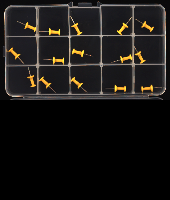

In [13]:
img = ToPILImage()(Denormalize()(sample["image"].clone()))
msk = ToPILImage()(sample["mask"]).convert("RGB")

Image.fromarray(np.vstack((np.array(img), np.array(msk))))

An example of structural anomaly

dict_keys(['image', 'label', 'image_path', 'anotype', 'super_anotype', 'mask_paths', 'masks', 'mask'])

'structural_anomalies'

'broken'

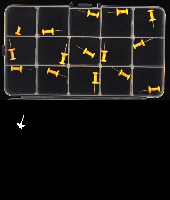

In [14]:
sample = mvtec_loco_dataset_segmentation_test[250]
sample.keys()
sample["super_anotype"]
sample["anotype"]
img = ToPILImage()(Denormalize()(sample["image"].clone()))
msk = ToPILImage()(sample["mask"]).convert("RGB")

Image.fromarray(np.vstack((np.array(img), np.array(msk))))

An example of logical anomaly

dict_keys(['image', 'label', 'image_path', 'anotype', 'super_anotype', 'mask_paths', 'masks', 'mask'])

'logical_anomalies'

'missing_separator'

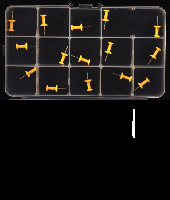

In [15]:
sample = mvtec_loco_dataset_segmentation_test[200]
sample.keys()
sample["super_anotype"]
sample["anotype"]
img = ToPILImage()(Denormalize()(sample["image"].clone()))
msk = ToPILImage()(sample["mask"]).convert("RGB")

Image.fromarray(np.vstack((np.array(img), np.array(msk))))

An example of logical anomaly with multiple anomalous regions

**Important**: the ground truth can have multiple masks (one for each logical anomalous region).

The **union** of the (multiple) masks is conveniently returned in the field `"mask"`, but the individual `"masks"` (with **s**!) should be considered for correct evaluation!

dict_keys(['image', 'label', 'image_path', 'anotype', 'super_anotype', 'mask_paths', 'masks', 'mask'])

'logical_anomalies'

'additional_1_pushpin'

tensor([0., 1.], dtype=torch.float64)

array([  0, 255], dtype=uint8)

tensor([0., 1., 2.], dtype=torch.float64)

array([  0,  56, 156], dtype=uint8)

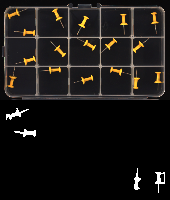

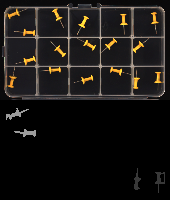

In [38]:
sample = mvtec_loco_dataset_segmentation_test[150]
sample.keys()
sample["super_anotype"]
sample["anotype"]
img = np.array(ToPILImage()(Denormalize()(sample["image"].clone())))
msk = np.array(ToPILImage()(sample["mask"]).convert("RGB"))

# !!!!!
# "100 * " is artifically increasing the gtvalue of the mask to make it more visible
msks = np.array(ToPILImage()(100 * sample["masks"]).convert("RGB"))
# !!!!!

sample["mask"].unique()
np.unique(msk)

sample["masks"].unique()
np.unique(msks)

Image.fromarray(np.vstack((img, msk)))
Image.fromarray(np.vstack((img, msks)))

### DataModule

So far, we have shown the Torch Dateset implementation of MVTec LOCO AD dataset. This is quite useful to get a sample, but we do need more than this when we train models in an end-to-end fashion.
 
The [PyTorch Lightning DataModule](https://pytorch-lightning.readthedocs.io/en/latest/data/datamodule.html) for MVTec LOCO AD (shown below) is handles the the dataset download, and train/val/test/inference dataloaders instantiation.

In [39]:
MVTecLOCO??

Init signature:
MVTecLOCO(
    root: str,
    category: str,
    task: str = 'segmentation',
    imread_strategy: str = 'preload',
    image_size: Union[int, Tuple[int, int], NoneType] = None,
    num_workers: int = 8,
    train_batch_size: int = 32,
    transform_config_train: Union[str, albumentations.core.composition.Compose, NoneType] = None,
    test_batch_size: int = 32,
    transform_config_val: Union[str, albumentations.core.composition.Compose, NoneType] = None,
) -> None
Source:        
class MVTecLOCO(LightningDataModule):
    """MVTec LOCO AD Lightning Data Module."""

    # todo correct inconsistency: `transform_config_*val*` used for val and
    #   test set, but `*test*_batch_size` used for val and set

    def __init__(
        self,
        root: str,
        category: str,
        task: str = TASK_SEGMENTATION,
        imread_strategy: str = IMREAD_STRATEGY_PRELOAD,
        image_size: Optional[Union[int, Tuple[int, int]]] = None,
        num_workers: int = 8,
       

In [40]:
mvtec_datamodule = MVTecLOCO(
    root="../../datasets/MVTecLOCO",
    category="pushpins",
    image_size=(200, 340),  # (height, width) 5x smaller than original
    train_batch_size=32,
    test_batch_size=32,
    num_workers=8,
    task="segmentation",
)

# verify if the dataset is available and download it if not
mvtec_datamodule.prepare_data()

In [41]:
# Train images

# instantiate the Torch Dataset(s), loading the (meta-)data into memory
mvtec_datamodule.setup("fit")

i, data = next(enumerate(mvtec_datamodule.train_dataloader()))
data.keys()
data["image"].shape

/home/jcasagrandebertoldo/repos/anomalib/anomalib/data/mvtec_loco.py:794: UserWarning: Preloading images into memory. If your dataset is too large, consider using another imread_strategy instead.
  self.train_data = MVTecLOCODataset(


dict_keys(['image'])

torch.Size([32, 3, 200, 340])

In [44]:
# Validation images
mvtec_datamodule.setup("validate")
i, data = next(enumerate(mvtec_datamodule.val_dataloader()))
data.keys()
data["image"].shape
data["mask"].shape
data["masks"].shape
data["super_anotype"][0], data["anotype"][0]

dict_keys(['image', 'label', 'image_path', 'anotype', 'super_anotype', 'mask_paths', 'masks', 'mask'])

torch.Size([32, 3, 200, 340])

torch.Size([32, 200, 340])

torch.Size([32, 200, 340])

('good', 'good')

dict_keys(['image', 'label', 'image_path', 'anotype', 'super_anotype', 'mask_paths', 'masks', 'mask'])

torch.Size([32, 3, 200, 340])

torch.Size([32, 200, 340])

tensor([0., 1.], dtype=torch.float64)

torch.Size([32, 200, 340])

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15.], dtype=torch.float64)

('logical_anomalies', 'additional_1_pushpin')

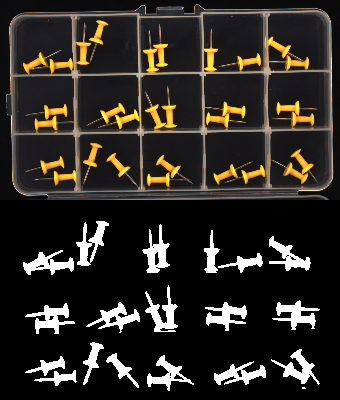

In [46]:
# Test images
mvtec_datamodule.setup("test")
# iterate a few times so we can find a sample with an anomaly
for i, data in enumerate(mvtec_datamodule.test_dataloader()):
    if i == 5:
        break
data.keys()
data["image"].shape
data["mask"].shape
data["mask"].unique()
data["masks"].shape
data["masks"].unique()
data["super_anotype"][0], data["anotype"][0]

img = ToPILImage()(Denormalize()(data["image"][0].clone()))
msk = ToPILImage()(data["mask"][0]).convert("RGB")

Image.fromarray(np.vstack((np.array(img), np.array(msk))))